In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = img.imread('test.jpeg')

In [3]:
w, h = m.shape[:2]

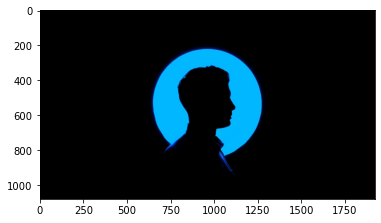

In [4]:
imgplot = plt.imshow(m)
plt.show()

# Scaling using the nearest neighbor

In [30]:
def nearestNeighborScaling(org_img, new_width, new_height):
    output = np.zeros([new_width, new_height, org_img.shape[2]])
    org_width, org_height = org_img.shape[:2]
    for i in range(new_width):
        for j in range(new_height):
            x = min(int(round(i/new_width * org_width)), org_width-1)
            y = min(int(round(j/new_height * org_height)), org_height-1)
            output[i,j] = org_img[x,y]
    return output.astype('uint8')

In [24]:
def NNS(org_img, new_width, new_height):
    output = np.zeros([new_width, new_height, org_img.shape[2]])
    org_width, org_height = org_img.shape[:2]
    xScale = new_width/(org_width-1)
    yScale = new_height/(org_height-1)
    for i in range(new_width-1):
        for j in range(new_height-1):
            output[i+1,j+1] = org_img[1 + int(i / xScale), 1 + int(j / yScale)]
    return output 

## Test

In [18]:
output = nearestNeighborScaling(m, 3*w, 4*h)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


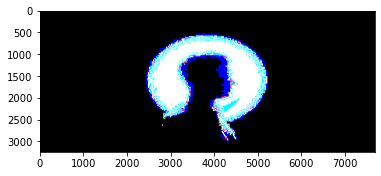

In [19]:
imgplot = plt.imshow(output)
plt.show()

In [31]:
#img.imsave('scaled.png', output)
output = output.astype('uint8')

In [28]:
img.imsave('scaled.png', output)

In [32]:
output.shape

(3240, 7680, 3)

In [33]:
target = NNS(m, 3*w, 4*h